# 6.1. Clustering de productos bursátiles.
Para ello vamos a hacer uso de la función Kmeans disponible en la librería sklearn.cluster.

<b>Paso 1.</b> Importación de librerías.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans

<b>Paso 2.</b> Carga de datos procedentes del fichero csv.

In [15]:
df = pd.read_csv("6.1.productos_bursatiles.csv", sep=";")

<b>Paso 3.</b> Comprobación de la carga de datos.

In [16]:
df.head()

,Date,wkn_500340,wkn_514000,wkn_515100,wkn_519000,wkn_543900,wkn_555200,wkn_555750,wkn_575200,wkn_578580,...,wkn_725750,wkn_750000,wkn_766400,wkn_800100,wkn_802770,wkn_803200,wkn_823212,wkn_840400,wkn_843002,wkn_846900
0,2004-06-23,24.2875,64.00,21.45,35.15,39.27,17.38,14.04,22.67,20.26665,...,38.90,13.42,33.69,28.81,23.55,13.94,10.67,86.10,87.20,3.945
1,2004-06-24,24.6250,64.15,21.78,35.70,39.50,17.08,14.18,23.35,20.44998,...,38.95,13.59,34.16,29.15,23.65,14.16,10.79,87.00,88.30,4.007
2,2004-06-25,24.6500,64.00,21.75,35.40,39.70,17.33,14.36,23.37,20.36998,...,38.35,13.63,34.22,29.47,23.75,14.17,10.71,87.00,87.80,4.013
3,2004-06-28,24.9750,65.50,22.24,36.30,39.85,17.35,14.60,23.69,20.39998,...,39.15,13.79,34.82,29.48,23.85,14.56,10.97,89.40,90.50,4.069
4,2004-06-29,24.8750,65.01,22.29,36.35,39.80,17.55,14.58,23.70,20.39998,...,39.40,13.86,34.60,29.92,23.70,14.58,11.26,89.75,90.35,4.070


,Date,wkn_500340,wkn_514000,wkn_515100,wkn_519000,wkn_543900,wkn_555200,wkn_555750,wkn_575200,wkn_578580,...,wkn_725750,wkn_750000,wkn_766400,wkn_800100,wkn_802770,wkn_803200,wkn_823212,wkn_840400,wkn_843002,wkn_846900
0,2004-06-23,24.2875,64.00,21.45,35.15,39.27,17.38,14.04,22.67,20.26665,...,38.90,13.42,33.69,28.81,23.55,13.94,10.67,86.10,87.20,3.945
1,2004-06-24,24.6250,64.15,21.78,35.70,39.50,17.08,14.18,23.35,20.44998,...,38.95,13.59,34.16,29.15,23.65,14.16,10.79,87.00,88.30,4.007
2,2004-06-25,24.6500,64.00,21.75,35.40,39.70,17.33,14.36,23.37,20.36998,...,38.35,13.63,34.22,29.47,23.75,14.17,10.71,87.00,87.80,4.013
3,2004-06-28,24.9750,65.50,22.24,36.30,39.85,17.35,14.60,23.69,20.39998,...,39.15,13.79,34.82,29.48,23.85,14.56,10.97,89.40,90.50,4.069
4,2004-06-29,24.8750,65.01,22.29,36.35,39.80,17.55,14.58,23.70,20.39998,...,39.40,13.86,34.60,29.92,23.70,14.58,11.26,89.75,90.35,4.070


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1107 non-null   object 
 1   wkn_500340  1107 non-null   float64
 2   wkn_514000  1107 non-null   float64
 3   wkn_515100  1107 non-null   float64
 4   wkn_519000  1107 non-null   float64
 5   wkn_543900  1107 non-null   float64
 6   wkn_555200  1107 non-null   float64
 7   wkn_555750  1107 non-null   float64
 8   wkn_575200  1107 non-null   float64
 9   wkn_578580  1107 non-null   float64
 10  wkn_581005  1107 non-null   float64
 11  wkn_593700  1107 non-null   float64
 12  wkn_604843  1107 non-null   float64
 13  wkn_623100  1107 non-null   float64
 14  wkn_648300  1107 non-null   float64
 15  wkn_659990  1107 non-null   float64
 16  wkn_703712  1107 non-null   float64
 17  wkn_710000  1107 non-null   float64
 18  wkn_716200  1107 non-null   float64
 19  wkn_716460  1107 non-null  

<b>Paso 4a</b>. Normalización de los datos bursátiles.

Nótese que la normalización se realiza sobre todo el conjunto de columnas de las que se dispone.
No hay que dejar fuera de la normalización ninguna variable "target" porque se está ante un problema no supervisado (cuando se trata de problemas supervisados, en el proceso de normalización la "y" se omite).

In [18]:
normalized_X = preprocessing.normalize(df.iloc[:, 1:30])
normalized_X

array([[0.11829316, 0.31171434, 0.10447301, ..., 0.05196863, 0.4193532 ,
        0.42471079],
       [0.11896256, 0.30990652, 0.10521846, ..., 0.05212613, 0.42029411,
        0.42657436],
       [0.11897954, 0.3089124 , 0.10498195, ..., 0.05169456, 0.4199278 ,
        0.4237892 ],
       ...,
       [0.09387188, 0.11703508, 0.08268311, ..., 0.03378304, 0.22794748,
        0.26817829],
       [0.09115742, 0.10739424, 0.07739375, ..., 0.03240645, 0.21556807,
        0.2621011 ],
       [0.09045459, 0.10140649, 0.07709597, ..., 0.03240951, 0.21214237,
        0.25716685]])

array([[0.11829316, 0.31171434, 0.10447301, ..., 0.05196863, 0.4193532 ,
        0.42471079],
       [0.11896256, 0.30990652, 0.10521846, ..., 0.05212613, 0.42029411,
        0.42657436],
       [0.11897954, 0.3089124 , 0.10498195, ..., 0.05169456, 0.4199278 ,
        0.4237892 ],
       ...,
       [0.09387188, 0.11703508, 0.08268311, ..., 0.03378304, 0.22794748,
        0.26817829],
       [0.09115742, 0.10739424, 0.07739375, ..., 0.03240645, 0.21556807,
        0.2621011 ],
       [0.09045459, 0.10140649, 0.07709597, ..., 0.03240951, 0.21214237,
        0.25716685]])

<b>Paso 4b.</b> Transposición de la matriz de datos para obtener una fila para cada producto con sus distintos valores (serie temporal).

In [19]:
transposed_X = normalized_X.transpose()

<b>Paso 5.</b> Comprobación de los datos traspuestos.

In [20]:
transposed_X

array([[0.11829316, 0.11896256, 0.11897954, ..., 0.09387188, 0.09115742,
        0.09045459],
       [0.31171434, 0.30990652, 0.3089124 , ..., 0.11703508, 0.10739424,
        0.10140649],
       [0.10447301, 0.10521846, 0.10498195, ..., 0.08268311, 0.07739375,
        0.07709597],
       ...,
       [0.05196863, 0.05212613, 0.05169456, ..., 0.03378304, 0.03240645,
        0.03240951],
       [0.4193532 , 0.42029411, 0.4199278 , ..., 0.22794748, 0.21556807,
        0.21214237],
       [0.42471079, 0.42657436, 0.4237892 , ..., 0.26817829, 0.2621011 ,
        0.25716685]])

array([[0.11829316, 0.11896256, 0.11897954, ..., 0.09387188, 0.09115742,
        0.09045459],
       [0.31171434, 0.30990652, 0.3089124 , ..., 0.11703508, 0.10739424,
        0.10140649],
       [0.10447301, 0.10521846, 0.10498195, ..., 0.08268311, 0.07739375,
        0.07709597],
       ...,
       [0.05196863, 0.05212613, 0.05169456, ..., 0.03378304, 0.03240645,
        0.03240951],
       [0.4193532 , 0.42029411, 0.4199278 , ..., 0.22794748, 0.21556807,
        0.21214237],
       [0.42471079, 0.42657436, 0.4237892 , ..., 0.26817829, 0.2621011 ,
        0.25716685]])

 ...]

 ...]

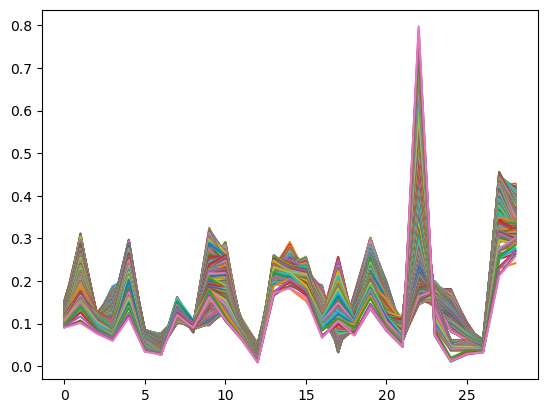

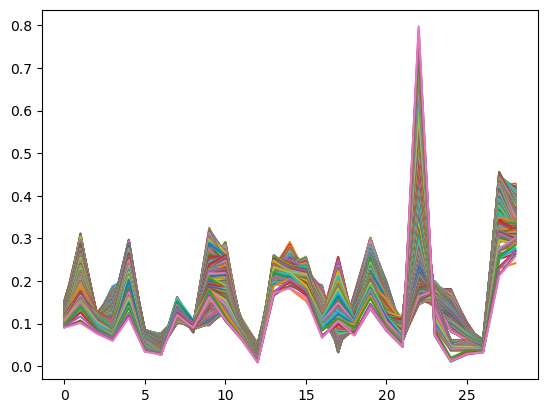

In [21]:
plt.plot(transposed_X)

<b>Paso 6.</b> Definición de KMeans y ajuste del modelo con los datos bursátiles.

In [22]:
k_means = KMeans(n_clusters=5, random_state=42, max_iter=600)
k_means.fit(transposed_X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

KMeans(max_iter=600, n_clusters=5, random_state=42)

KMeans(max_iter=600, n_clusters=5, random_state=42)

<b>Paso 6.</b> Una vez entrenado, se aplica el modelo sobre los datos para comprobar a qué cluster pertenecen.

In [23]:
clusters = k_means.predict(transposed_X)
clusters

array([3, 1, 3, 3, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 0, 3, 1, 3, 0,
       4, 3, 3, 0, 0, 2, 2])

array([3, 1, 3, 3, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 0, 3, 1, 3, 0,
       4, 3, 3, 0, 0, 2, 2])

<b>Paso 7.</b> Representar la clusterización de forma gráfica.

<b>Paso 7a.</b> Se constata que graficar transposed_X no aporta ningún valor sobre lo que nos ocupa: los clusters.

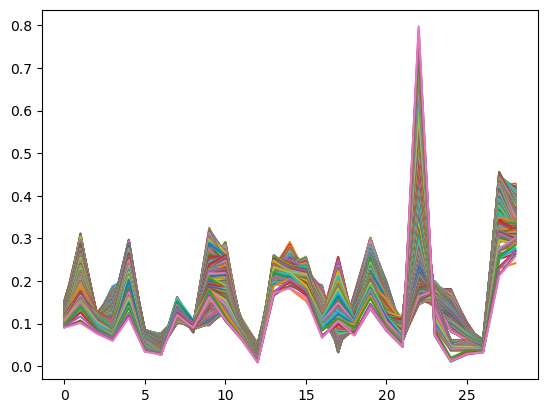

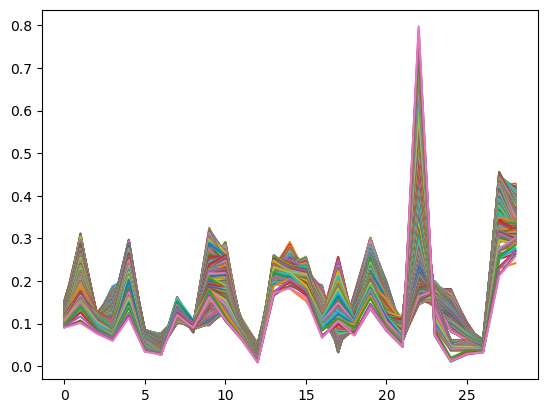

In [24]:
plt.plot(transposed_X)
plt.show()

<b>Paso 7b.</b> Se podría mapear cada etiqueta de cluster con un color distinto para que el gráfico pueda ser más significativo. 

In [25]:
LABEL_COLOR_MAP = {
    0 : "b",
    1 : "g",
    2 : "r",
    3 : "m",
    4 : "y"
}

label_color = [LABEL_COLOR_MAP[c] for c in clusters]
label_color

['m',
 'g',
 'm',
 'm',
 'g',
 'b',
 'b',
 'm',
 'b',
 'g',
 'g',
 'b',
 'b',
 'g',
 'g',
 'g',
 'm',
 'b',
 'm',
 'g',
 'm',
 'b',
 'y',
 'm',
 'm',
 'b',
 'b',
 'r',
 'r']

['m',
 'g',
 'm',
 'm',
 'g',
 'b',
 'b',
 'm',
 'b',
 'g',
 'g',
 'b',
 'b',
 'g',
 'g',
 'g',
 'm',
 'b',
 'm',
 'g',
 'm',
 'b',
 'y',
 'm',
 'm',
 'b',
 'b',
 'r',
 'r']

<b>Paso 7c.</b> De esta manera, a cada producto se le puede asignar un color según el cluster al que pertenece.

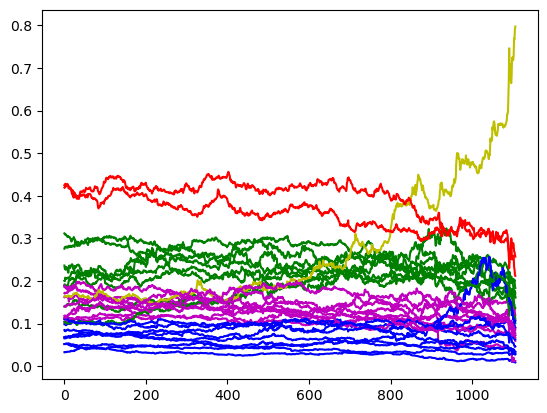

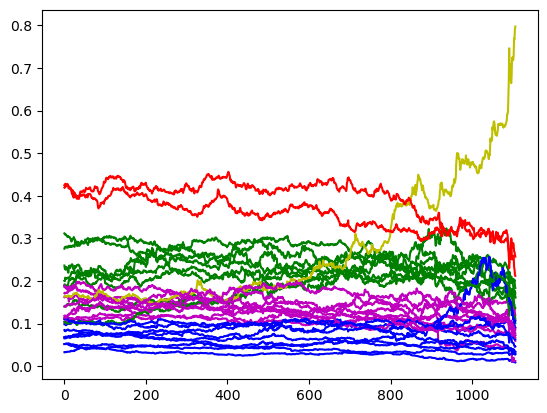

In [26]:
for i, color in enumerate(label_color, start=0):
    plt.plot(transposed_X[i], color=color)

plt.show()